# Random forest

## Setup

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

### Imports

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import graphviz 
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Hyperparmeters

In [4]:
# for get_data
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = False
split_size = (0.9, 0.0, 0.1)

### Get the data

In [5]:

y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 86 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 2 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 186 rows -> systolic bp too low.
Dropped 47 rows -> systolic bp too high.
Dropped 40 rows -> diastolic bp too low.
Dropped 948 rows -> diastolic bp too high.
Dropped 103 rows -> sytolic bp was lower than diastolic.


## Model

### Create and train the model

In [6]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train.values.ravel())
print(rf)

RandomForestClassifier()


## Evaluation

### Predict the test set

In [7]:
y_prob = rf.predict(x_test)
y_pred = np.round(y_prob)

In [8]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.31%


### Apply the evaluation metrics

Precision Score:
0.7121535181236673

Recall Score:
0.6958333333333333

F1-Score:
0.7038988408851422

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2552   945
Sick        1022  2338



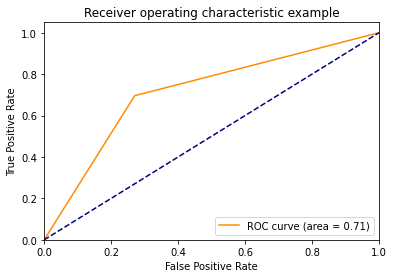


ROC Score:
0.7128008531121913


In [9]:
show_evaluation(y_test, y_pred, y_prob)

In [10]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train.values.ravel())



best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 46.9min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed: 116.6min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 197.4min
[Parallel(n_jobs=4)]: Done 864 out of 864 | elapsed: 262.3min finished


Precision Score:
0.7531969309462916

Recall Score:
0.7011904761904761

F1-Score:
0.7262638717632552

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2725   772
Sick        1004  2356



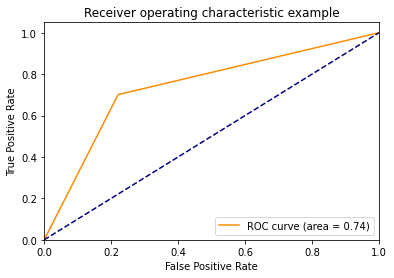


ROC Score:
0.7402149121015291


In [11]:
y_prob1 = grid_search.predict(x_test) 
y_pred1 = np.round(y_prob1)

show_evaluation(y_test, y_pred1, y_prob1)

In [12]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.10%


In [13]:
 # Creating an standardscaler object
std_slc = StandardScaler()

    # Creating a pca object
pca = decomposition.PCA()


    # Creating a pipeline of three steps. First, standardizing the data.
    # Second, tranforming the data with PCA.
    # Third, training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('rf', rf)])

    # Creating Parameter Space
    # Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,x_train.shape[1]+1,1))

    # Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

    # Creating a dictionary of all the parameter options 
    # Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,
                    rf__criterion=criterion,
                    rf__max_depth=max_depth)

    # Conducting Parameter Optmization With Pipeline
    # Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

    # Fitting the grid search
clf_GS.fit(x_train, y_train.values.ravel())


GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [2, 4, 6, 8, 10, 12]})

In [14]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['rf__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['rf__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['rf'])

y_prob2 = clf_GS.predict(x_test.astype('float32'))
y_pred2 = np.round(y_prob2)

Best Criterion: gini
Best max_depth: 10
Best Number Of Components: 10

RandomForestClassifier(max_depth=10)


Precision Score:
0.7491108955706434

Recall Score:
0.6895833333333333

F1-Score:
0.7181156051448938

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2721   776
Sick        1043  2317



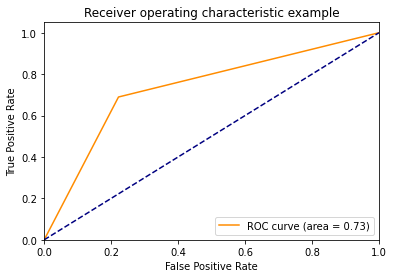


ROC Score:
0.7338394218854255


In [15]:
show_evaluation(y_test, y_pred2, y_prob2)

In [16]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.47%
